## Deep learning labelling 2d

Use for labelling 2d data for training neural network.  Can do labels from scratch or also use to modify existing labels.

## Load image and (optionally) label

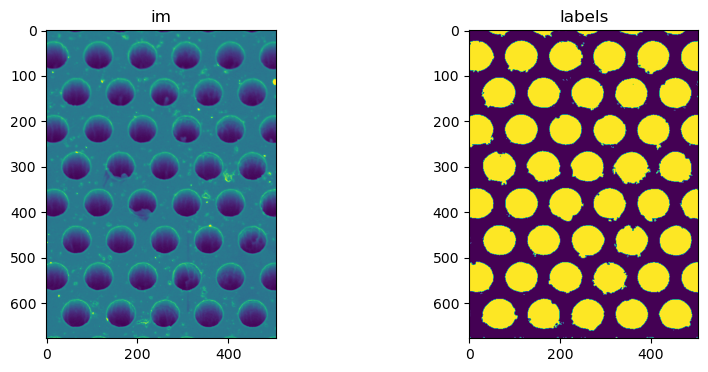

In [21]:
from skimage.io import imread
from matplotlib import pyplot as plt
from tnia.plotting.plt_helper import imshow_multi2d
import numpy as np

parent_path=r'D:\images\ListServDec12SEMn8mre'

im = imread(parent_path+r'\train.tif')

load_previous = True

if load_previous:
    labels = imread(parent_path+r'\weka_labels.tif')
else:
    labels = np.zeros_like(im).astype(np.uint32)

fig = imshow_multi2d([im, labels], ['im', 'labels'], 1, 2)

## Create Folders for input and truth (labels) sets

In [22]:
import os

train_path = os.path.join(parent_path, 'labels')

# here we append a 0 to the end of the input and ground truth folders, this is a convention we use so we could hypothetically extend to multiple input and ground truth channels
image_patch_path = train_path + '/input0'
label_patch_path = train_path + '/ground truth0'

if not os.path.exists(image_patch_path):
    os.makedirs(image_patch_path)

if not os.path.exists(label_patch_path):
    os.makedirs(label_patch_path)

## Run the next 3 cells multiple times to create input and label sets.

The cells do the following

1. The first cell creates unique input and label names
2. The second cell create a random patch and open the image and label patch in Napari.  Then the user can use Napari labelling tools to draw the labels. 
3. The third cell saves the image and label patch

In [24]:
from tnia.deeplearning.dl_helper import generate_patch_names
image_name, label_name = generate_patch_names(image_patch_path, label_patch_path, 'circles_sem')
print(image_name, label_name)

image path D:\images\ListServDec12SEMn8mre\labels/input0
mask path D:\images\ListServDec12SEMn8mre\labels/ground truth0
data name circles_sem
image  0 exists
image  1 exists
image  2 exists
image  3 exists
image  4 exists
image  5 exists
D:\images\ListServDec12SEMn8mre\labels/input0/circles_sem_6.tif
D:\images\ListServDec12SEMn8mre\labels/ground truth0/circles_sem_6.tif
D:\images\ListServDec12SEMn8mre\labels/input0/circles_sem_6.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0/circles_sem_6.tif


In [25]:
from random import randint
import numpy as np

patch_size = 256

x=randint(0,im.shape[1]-patch_size-1)
y=randint(0,im.shape[1]-patch_size-1)

ind = np.s_[y:y+patch_size, x:x+patch_size]

import napari
viewer=napari.Viewer()

viewer.add_image(im[ind], name='intensity')
viewer.add_labels(labels[ind], name='labels')



napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Labels layer 'labels' at 0x1fe1d81c250>

In [26]:
from tnia.plotting.plt_helper import imshow2d
from skimage.io import imsave

print('saving to ', image_name)

imsave(image_name, im[ind])
imsave(label_name, labels[ind])


saving to  D:\images\ListServDec12SEMn8mre\labels/input0/circles_sem_6.tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_21656\4125429304.py:7: UserWarning: D:\images\ListServDec12SEMn8mre\labels/ground truth0/circles_sem_6.tif is a low contrast image
  imsave(label_name, labels[ind])


D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_0.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_0.tif


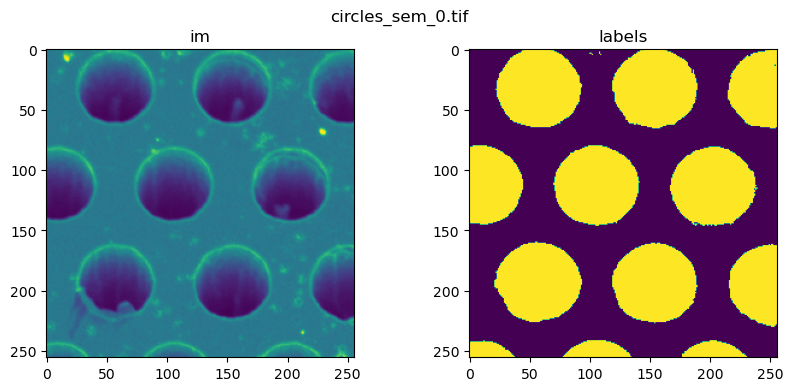

D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_1.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_1.tif


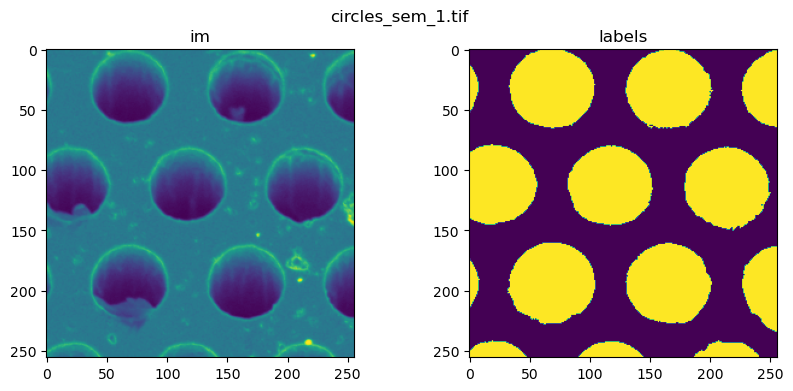

D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_2.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_2.tif


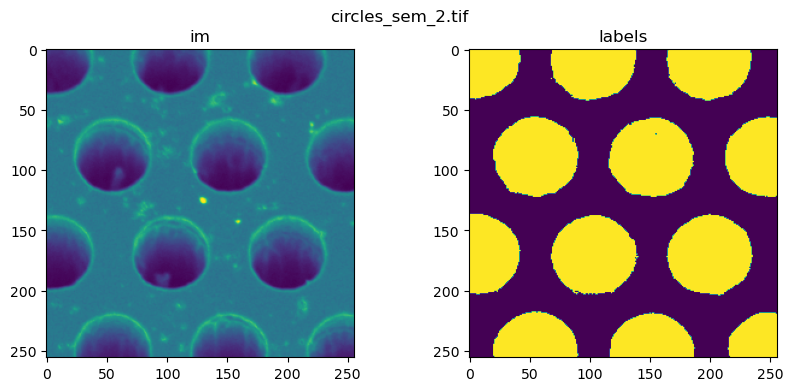

D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_3.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_3.tif


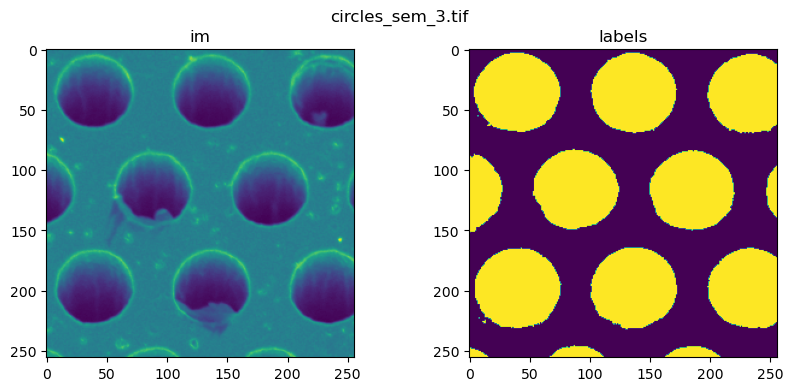

D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_4.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_4.tif


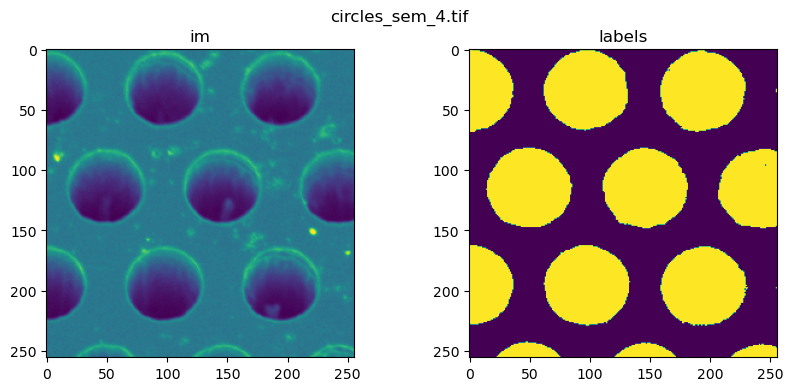

D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_5.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_5.tif


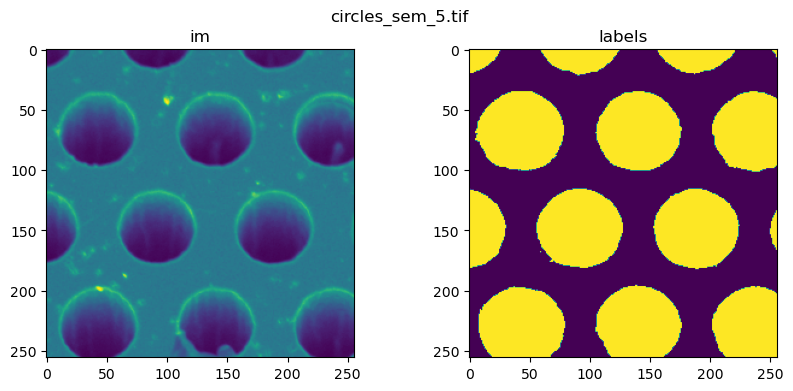

D:\images\ListServDec12SEMn8mre\labels/input0\circles_sem_6.tif D:\images\ListServDec12SEMn8mre\labels/ground truth0\circles_sem_6.tif


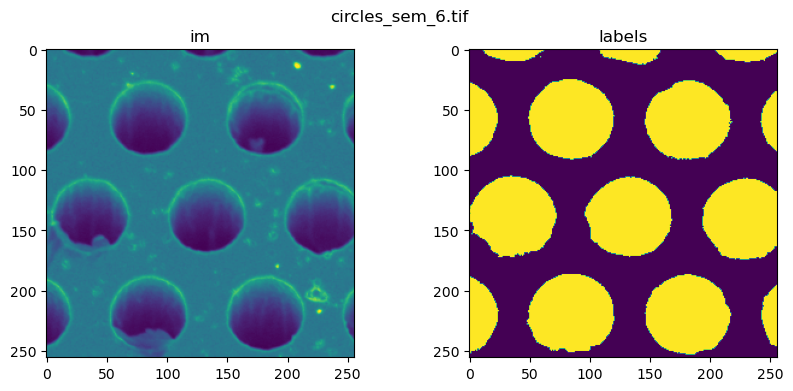

In [27]:
## loop through all files in image_patch_path and label_patch_path and load them into a list
from glob import glob
image_files = glob(image_patch_path+'/*')
label_files = glob(label_patch_path+'/*')

for image_file, label_file in zip(image_files, label_files):
    print(image_file, label_file)
    im = imread(image_file)
    labels = imread(label_file)
    fig = imshow_multi2d([im, labels], ['im', 'labels'], 1, 2)
    fig.suptitle(os.path.basename(image_file))
    plt.show()